In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [59]:
data = pd.read_excel('C:\\Users\\NANDAKISHORE BOINI\\OneDrive\\Desktop\\EastWestAirlines.xlsx', sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [61]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [62]:
data.describe()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [63]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values (if any)
# Identify numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# Check if there are any numeric columns
if len(numeric_cols) > 0:
    # Create an imputer for numeric columns
    imputer = SimpleImputer(strategy='mean')

    # Impute missing values in numeric columns only
    data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

    # Remove outliers using IQR
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

    # Scale the numeric features
    scaler = StandardScaler()
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
else:
    print("No numeric columns found in the dataset.")


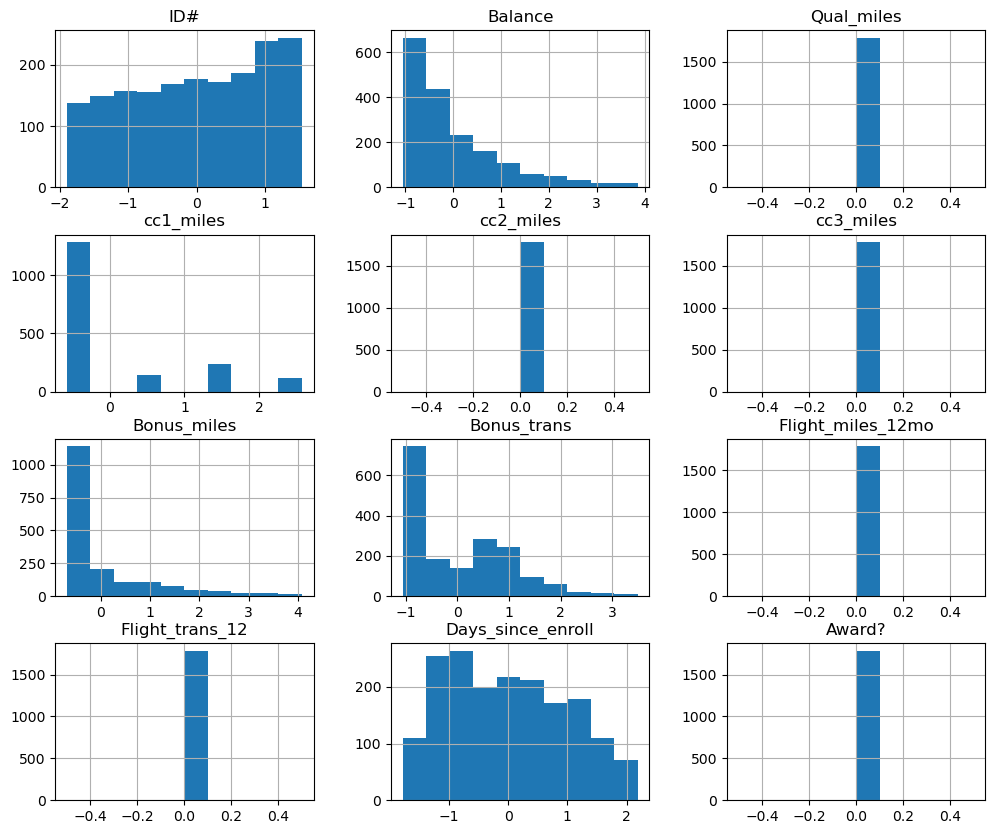

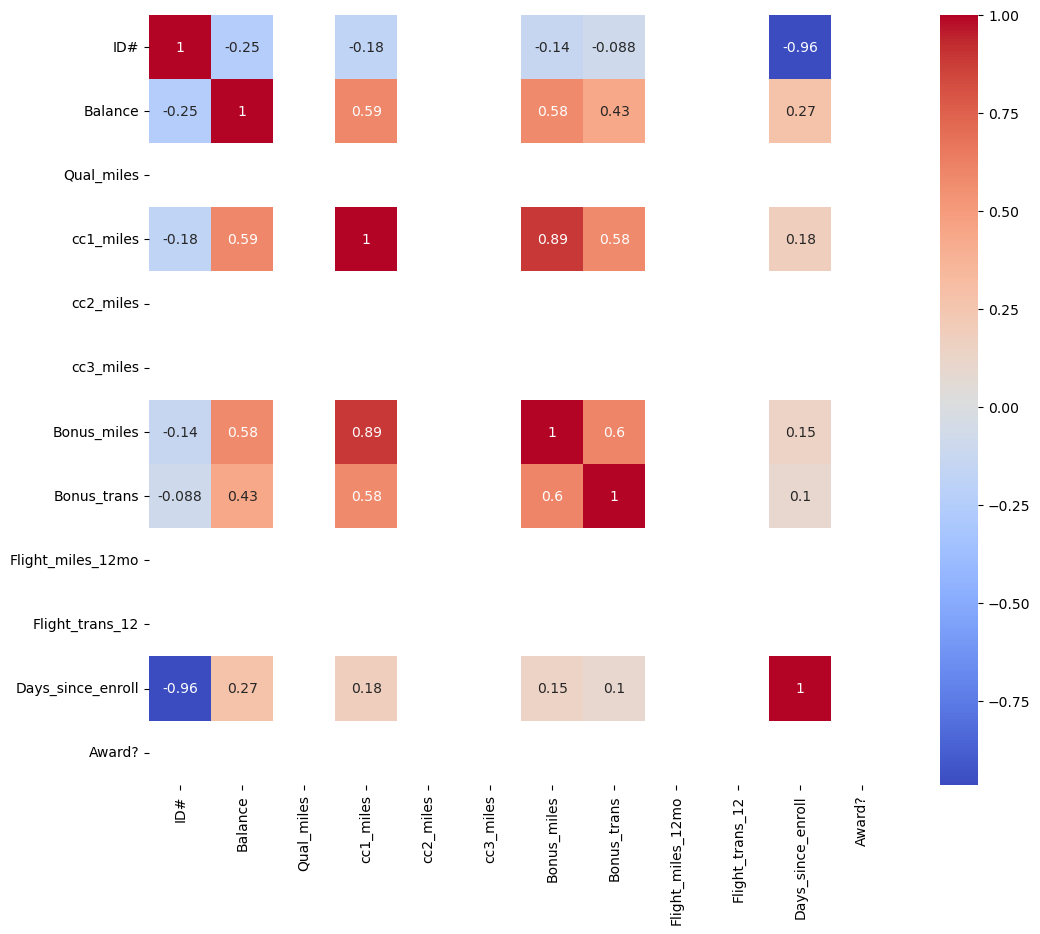

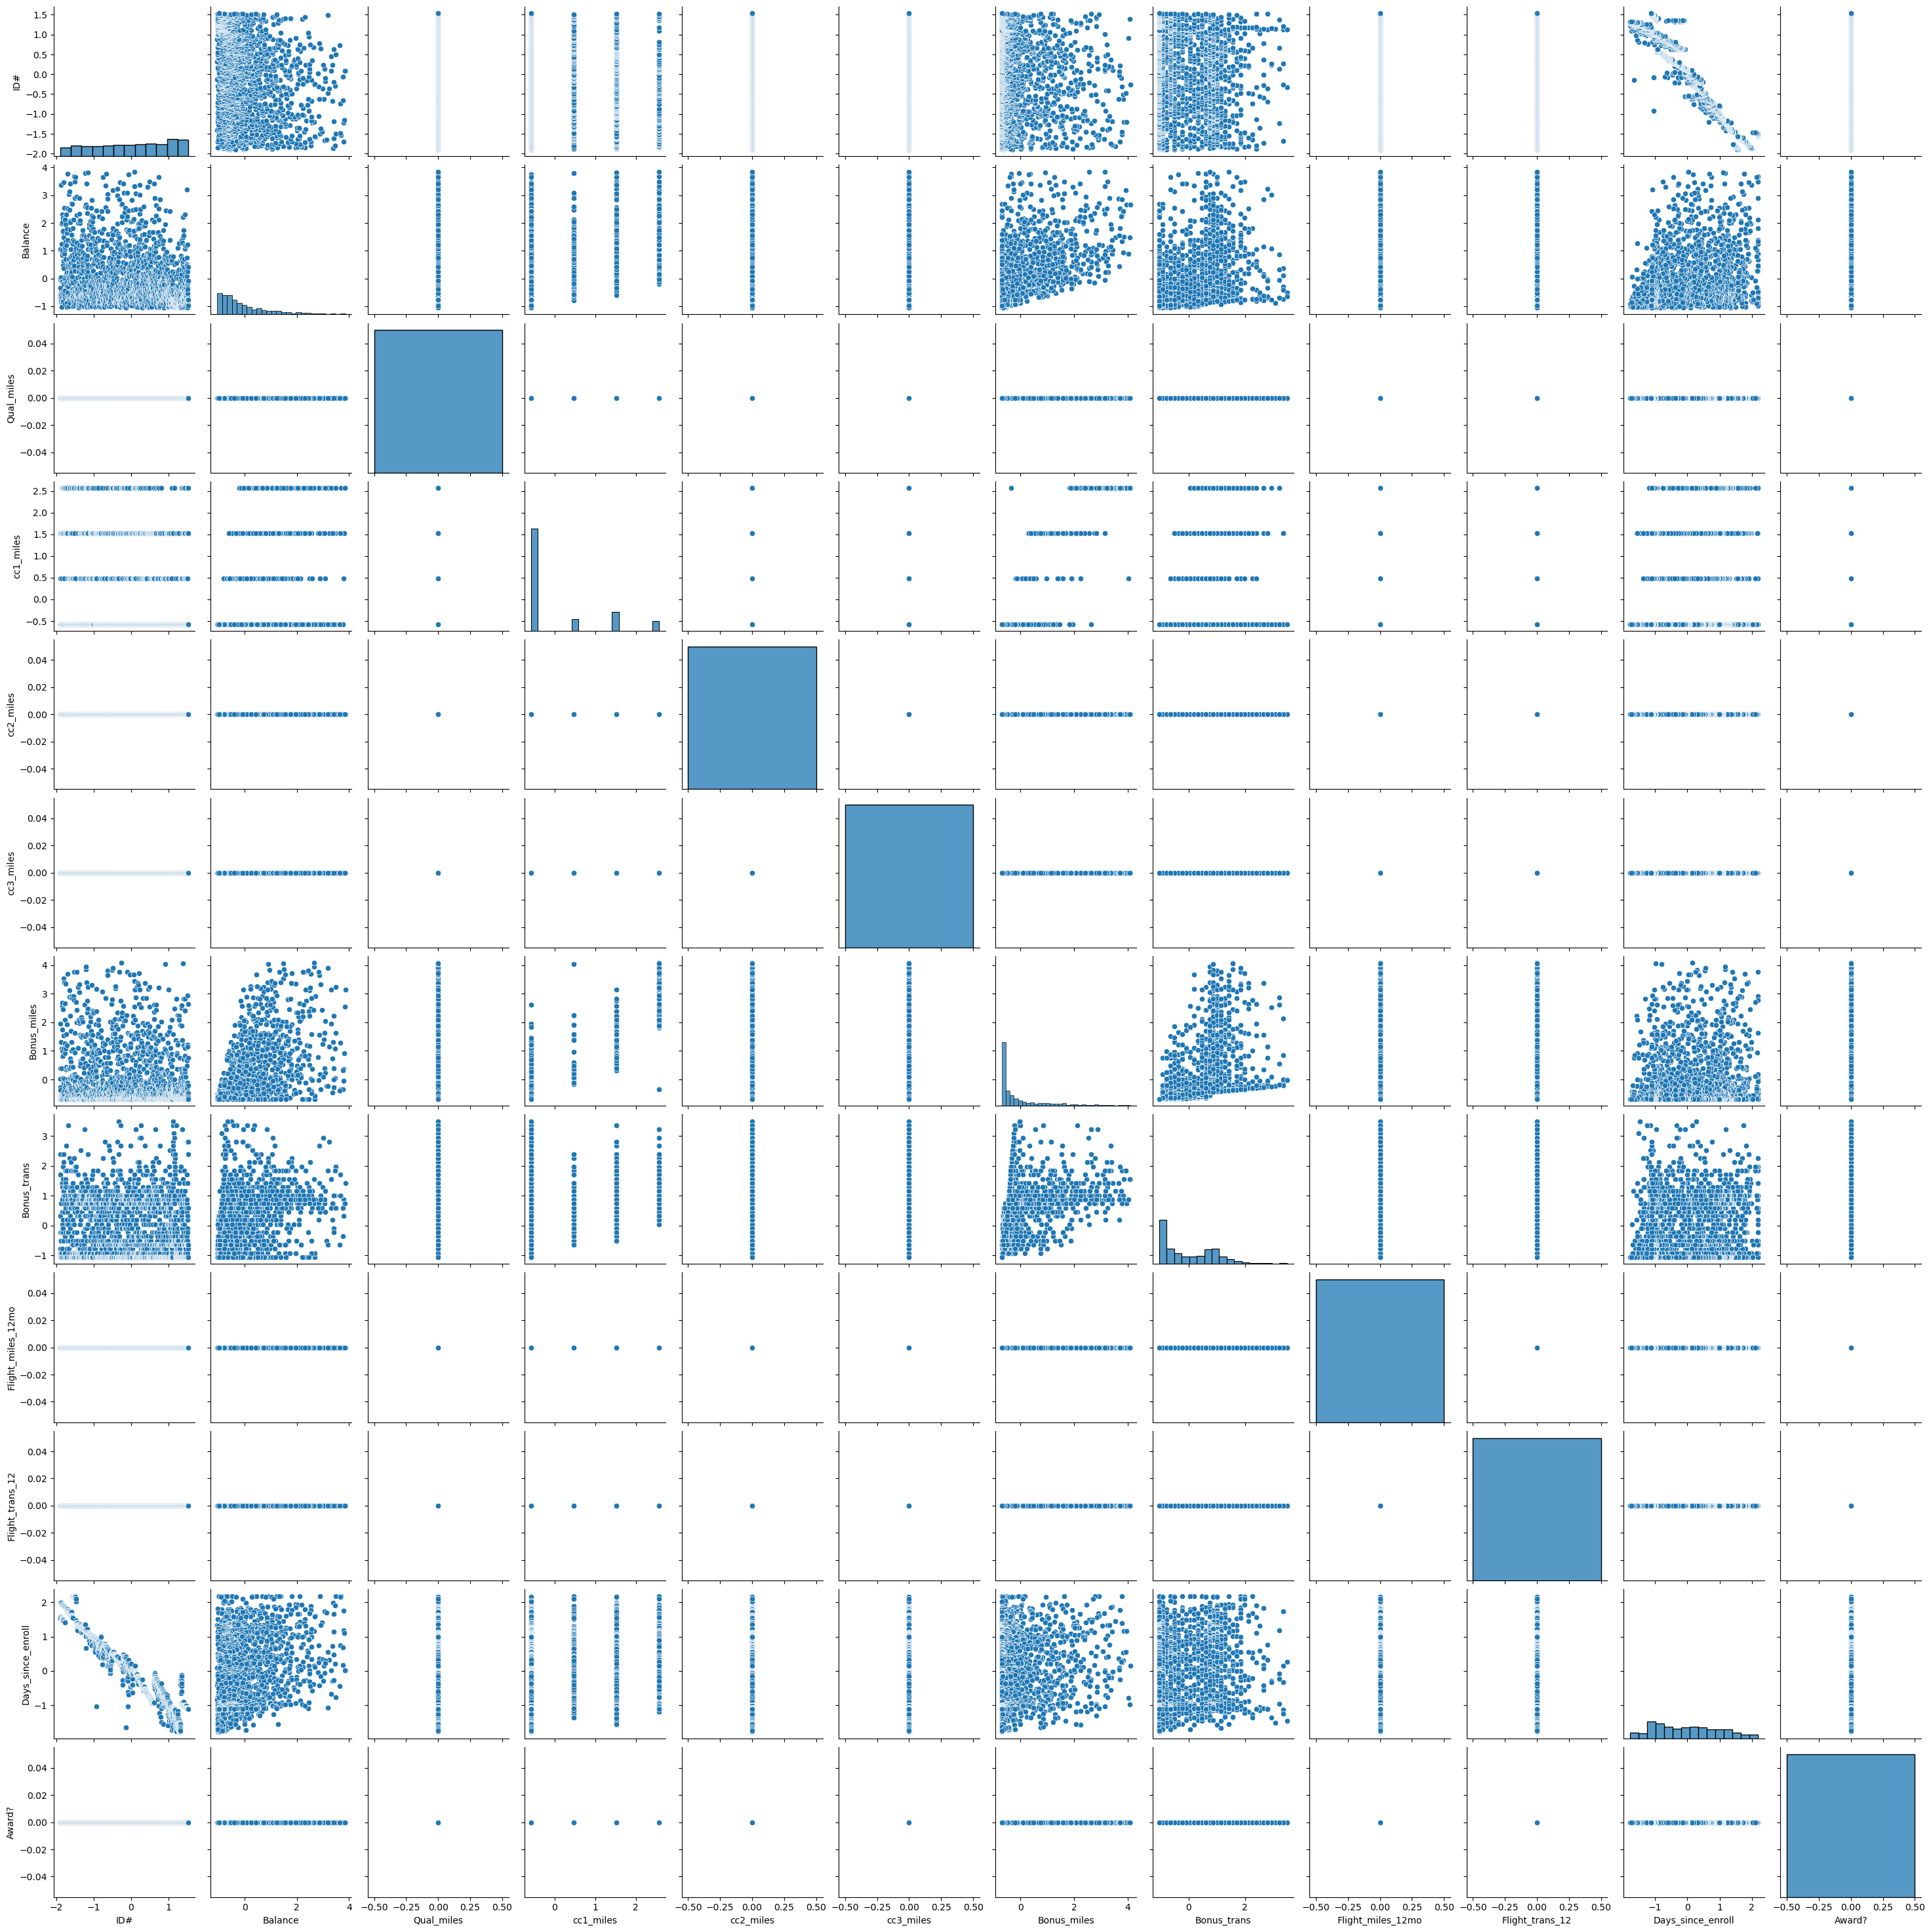

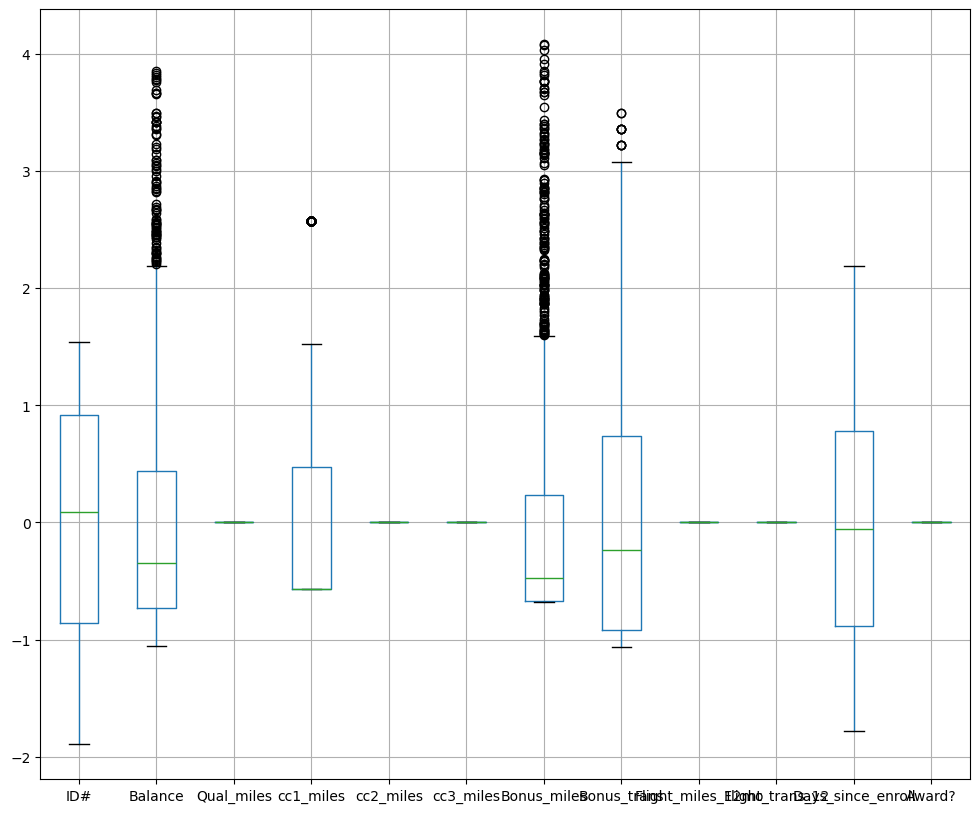

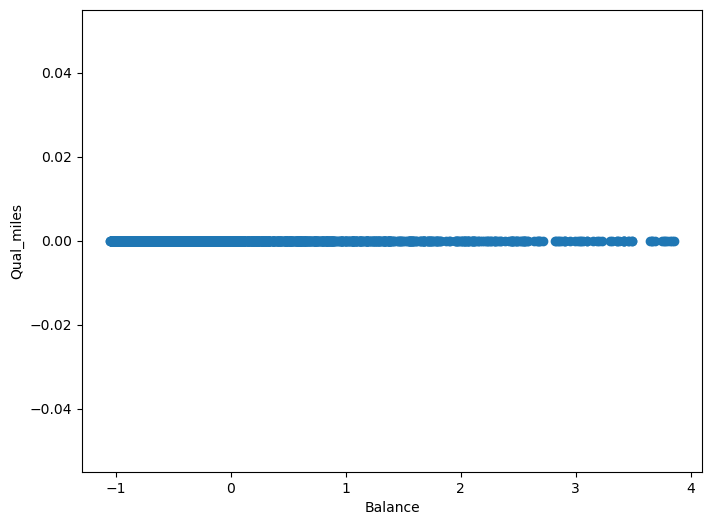

In [64]:
#Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for histogram
numerical_data = data.select_dtypes(include=['number'])

# Check if there are any numerical columns before plotting
if len(numerical_data.columns) > 0:
    # Visualize data distributions
    numerical_data.hist(figsize=(12, 10))
    plt.show()

    # Correlation matrix
    corr_matrix = data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.show()

    # Pairplot for visualizing relationships between variables
    sns.pairplot(data)
    plt.show()

    # Box plots to identify outliers
    data.boxplot(figsize=(12, 10))
    plt.show()

    # Scatter plots to explore relationships between variables
    plt.figure(figsize=(8, 6))
    plt.scatter(data['Balance'], data['Qual_miles'])
    plt.xlabel('Balance')
    plt.ylabel('Qual_miles')
    plt.show()

else:
    print("No numerical columns found in the dataset.")

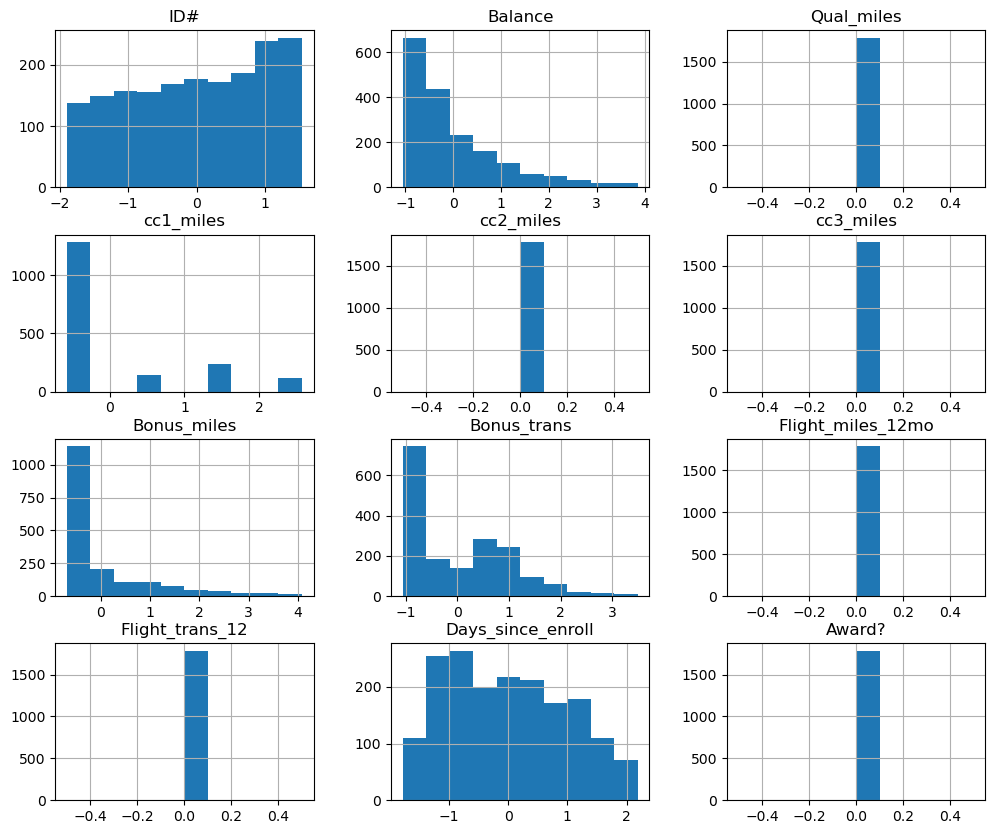

In [65]:
#Use multiple visualizations to understand the hidden patterns in the dataset

import matplotlib.pyplot as plt
import seaborn as sns
# Visualize data distributions
numerical_data = data.select_dtypes(include=['number'])
numerical_data.hist(figsize=(12, 10))
plt.show()



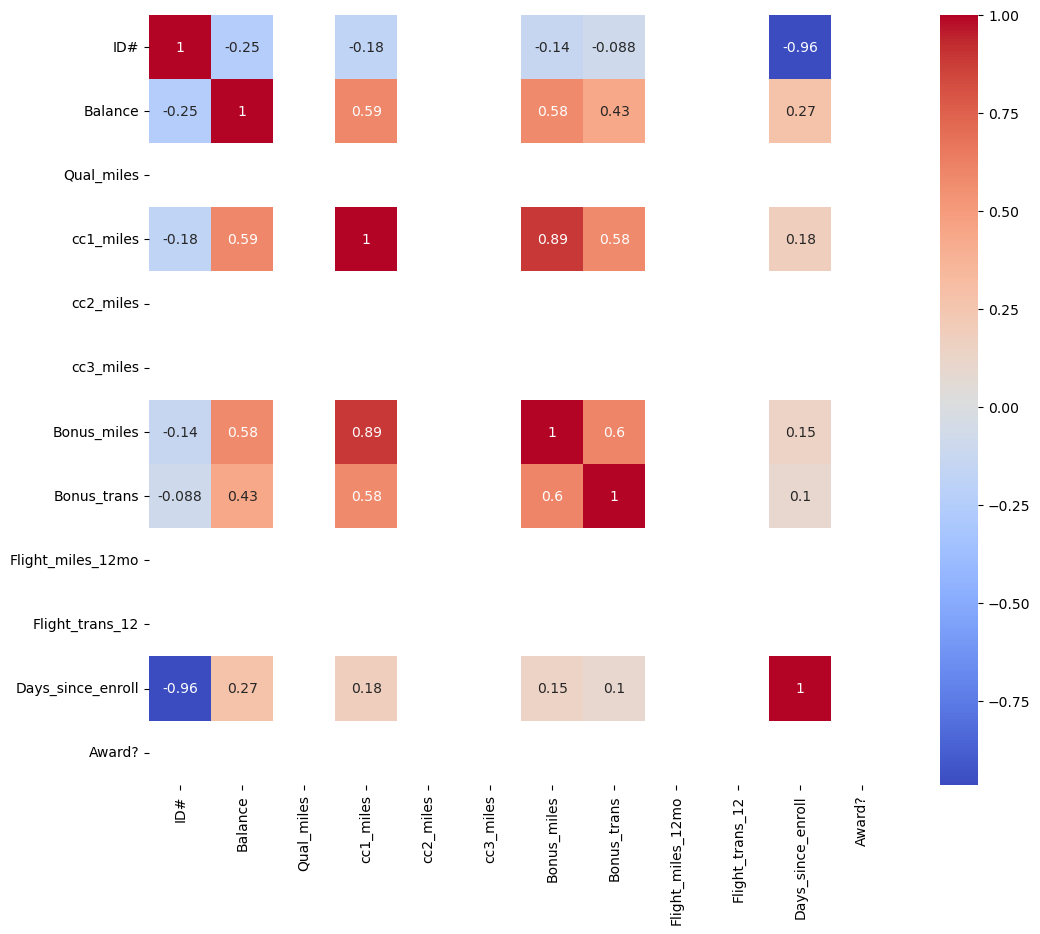

In [66]:
#Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


<Figure size 1200x1000 with 0 Axes>

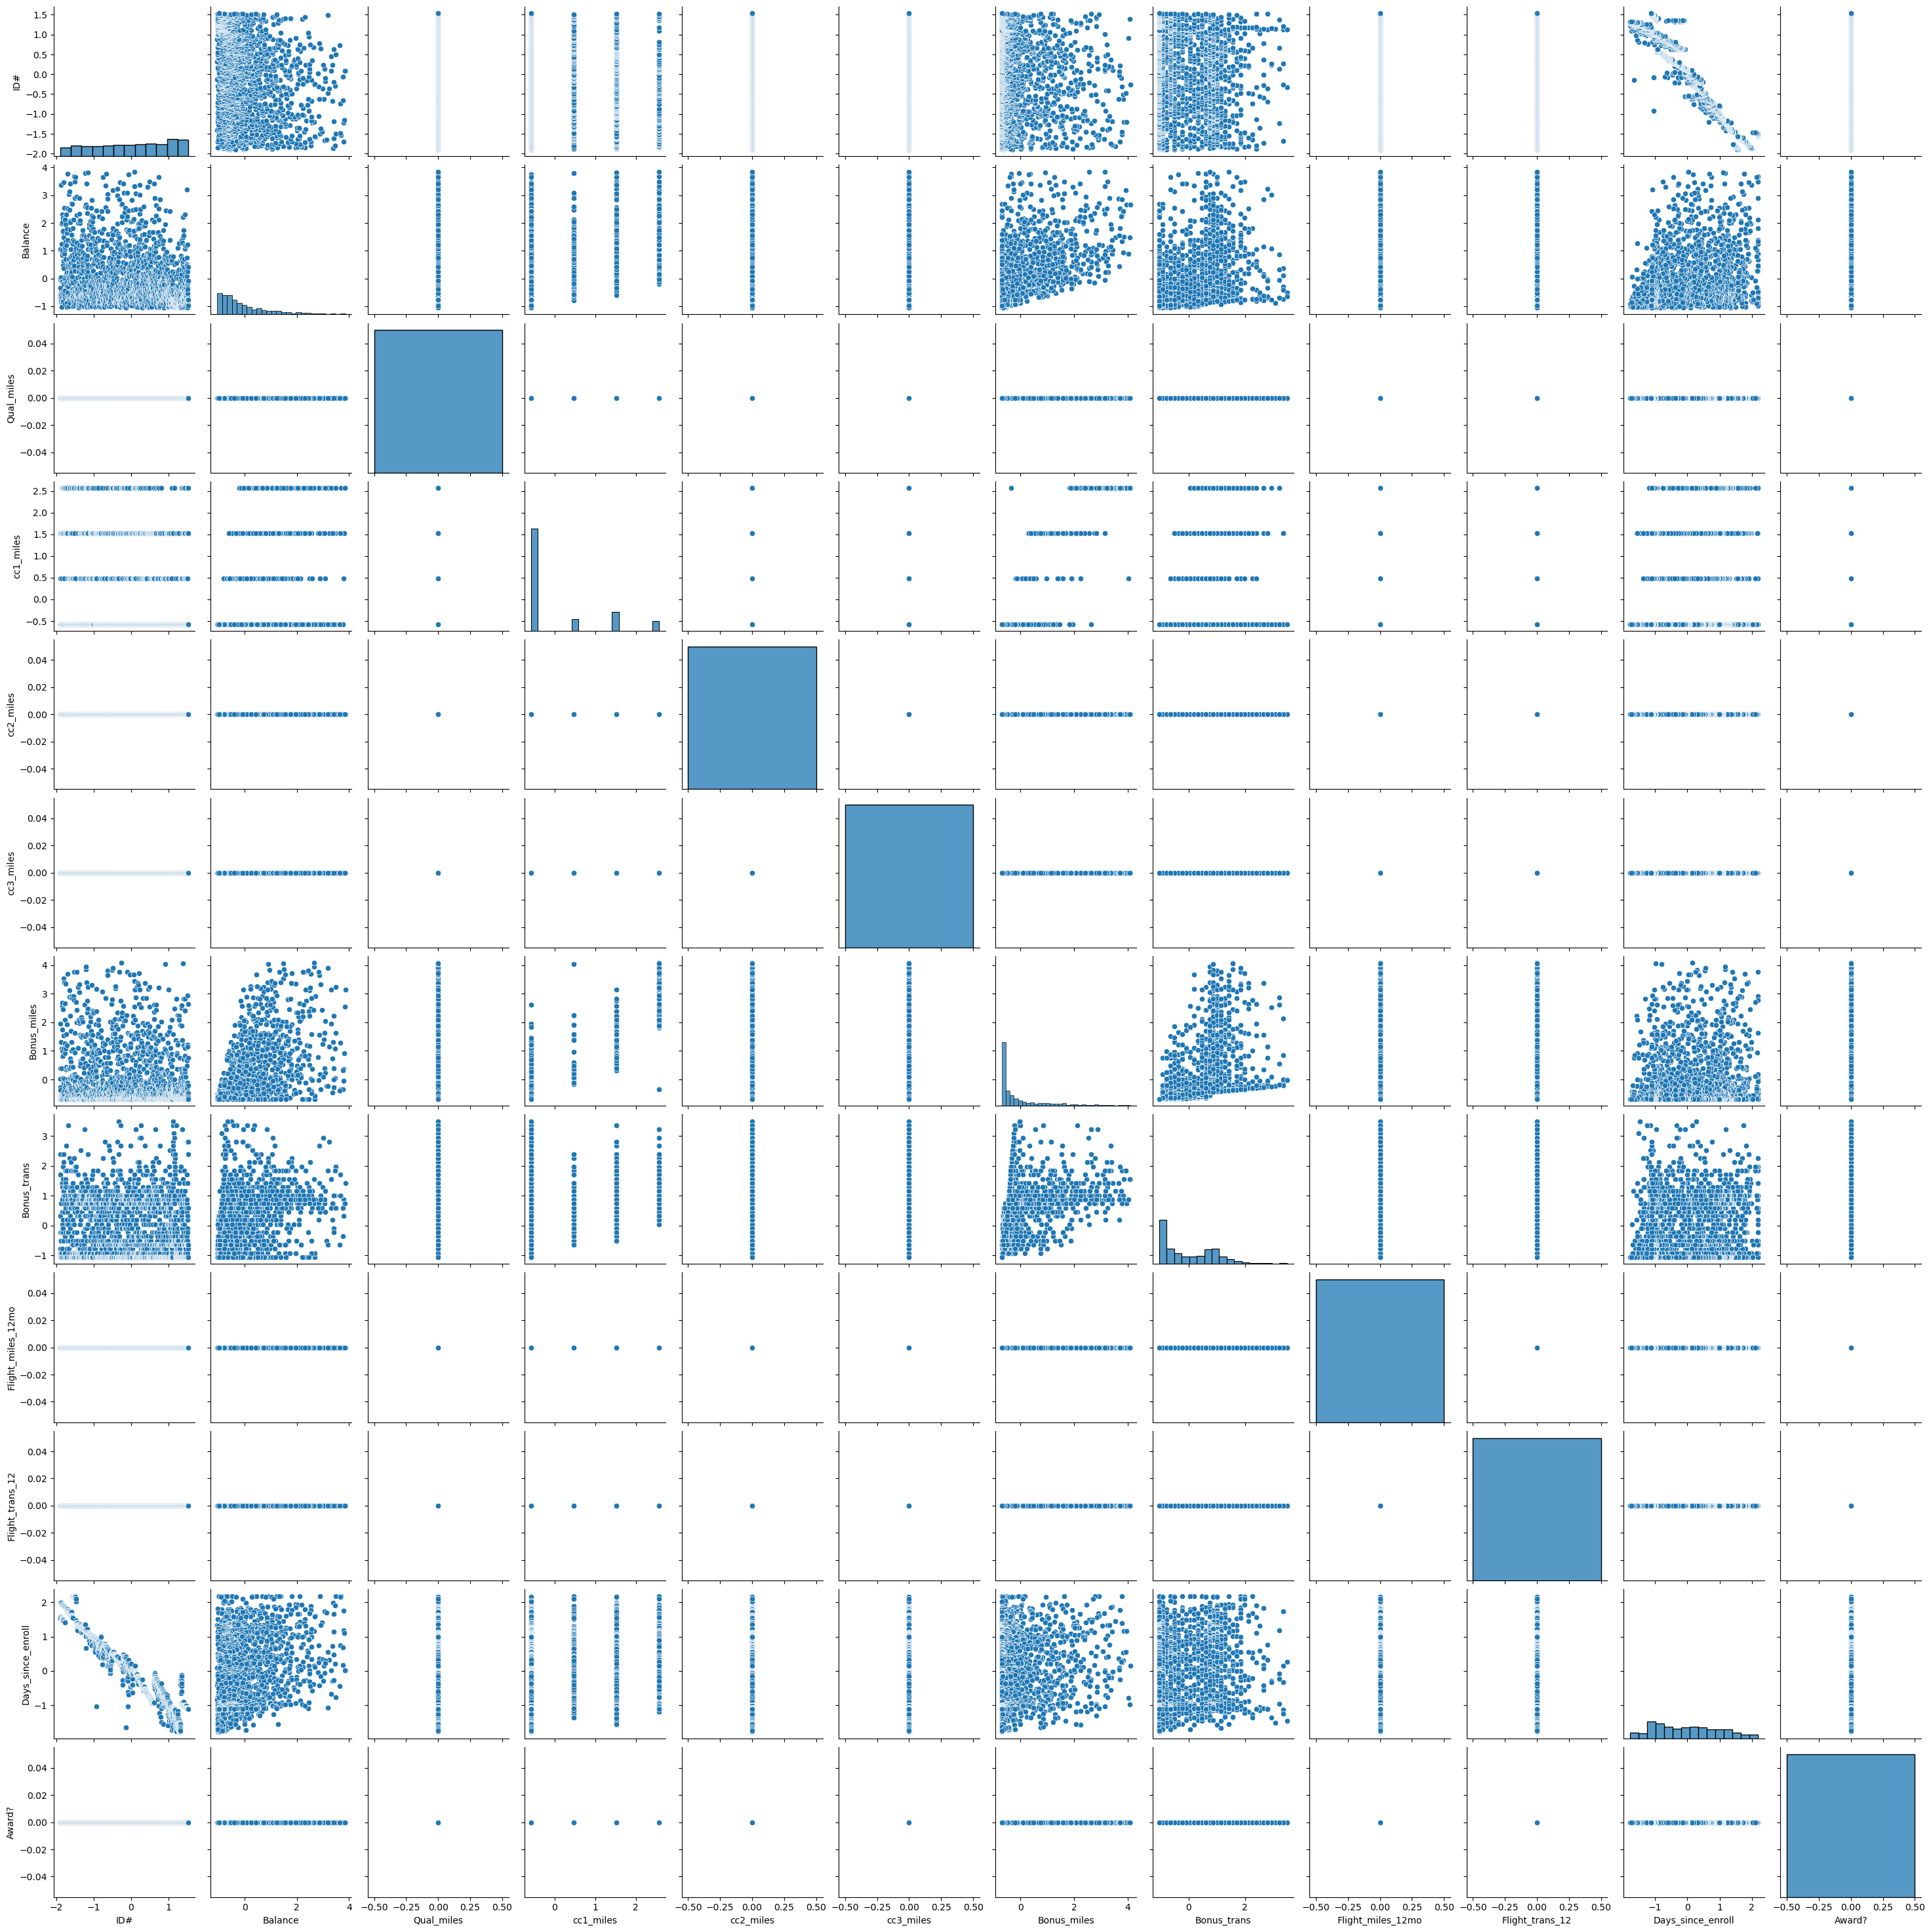

In [67]:
# Pairplot for visualizing relationships between variables
plt.figure(figsize=(12, 10))
sns.pairplot(data)
plt.show()

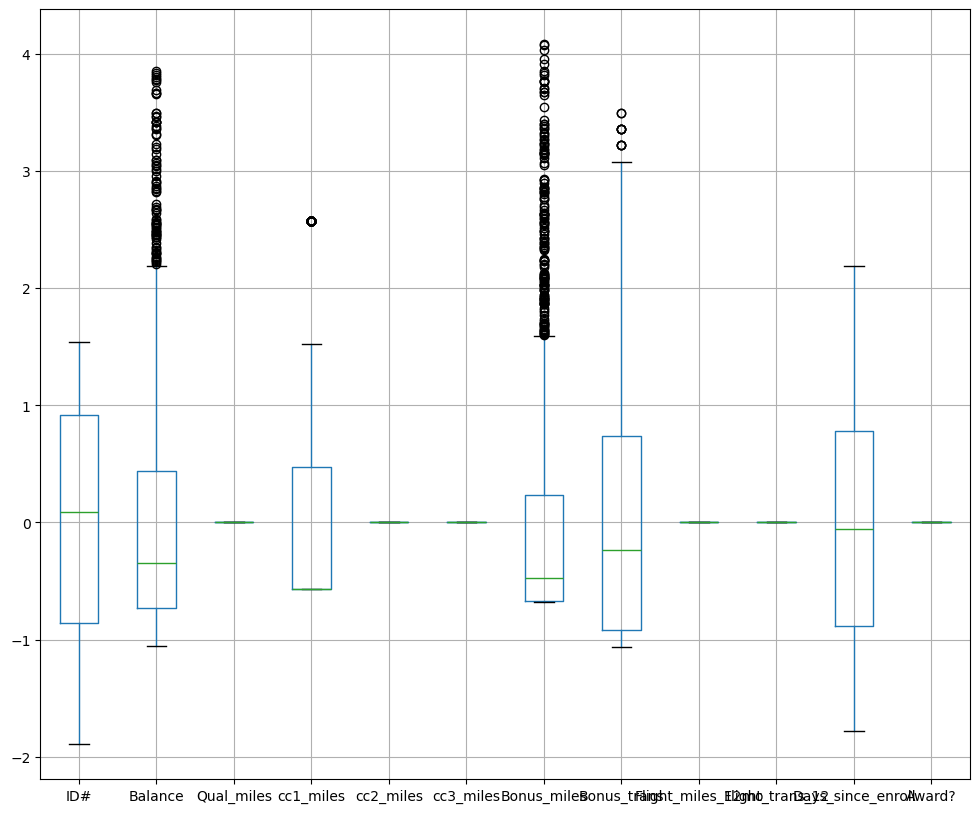

In [68]:
# Box plots to identify outliers
data.boxplot(figsize=(12, 10))
plt.show()

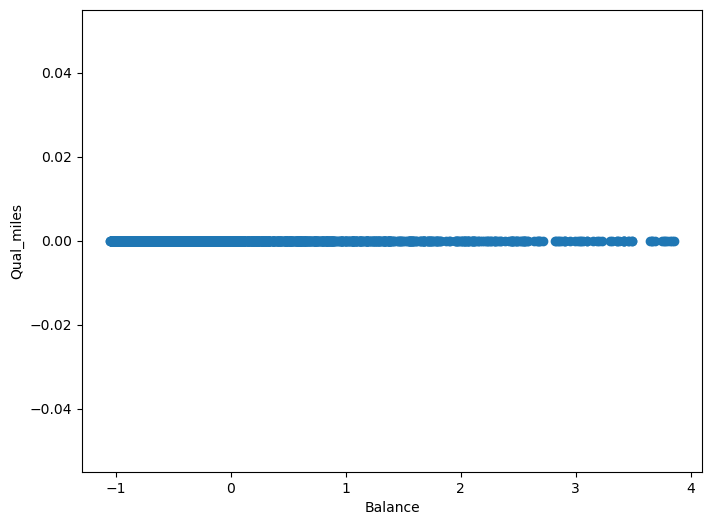

In [69]:
# Scatter plots to explore relationships between variables
plt.figure(figsize=(8, 6))
plt.scatter(data['Balance'], data['Qual_miles'])
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()

C:\Users\NANDAKISHORE BOINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


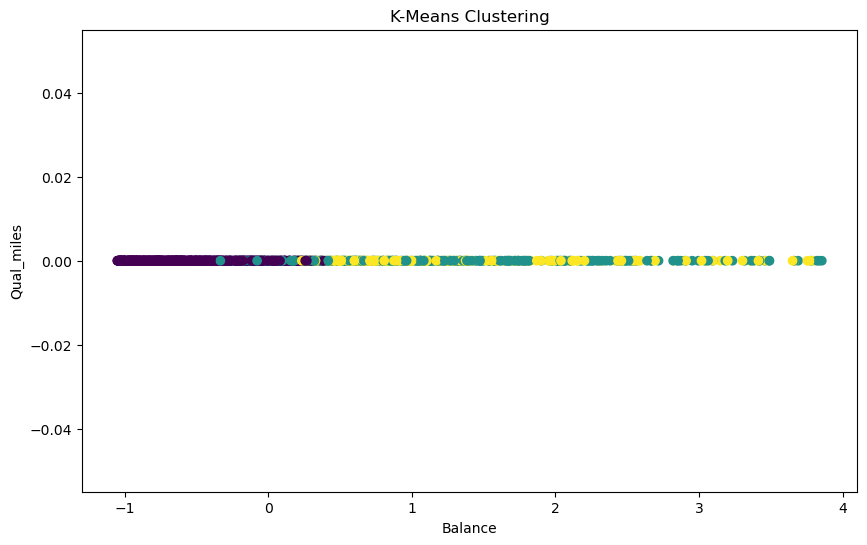

In [70]:

#Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import os
os.environ["OMP_NUM_THREADS"] = "7"

# Select features for clustering
X = data[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles']]

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42,n_init=10)  # Adjust n_clusters as needed
kmeans_labels = kmeans.fit_predict(X)
data['kmeans_cluster'] = kmeans_labels




# Visualize the clusters (optional)
plt.figure(figsize=(10, 6))
plt.scatter(data['Balance'], data['Qual_miles'], c=data['kmeans_cluster'])
plt.title('K-Means Clustering')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()




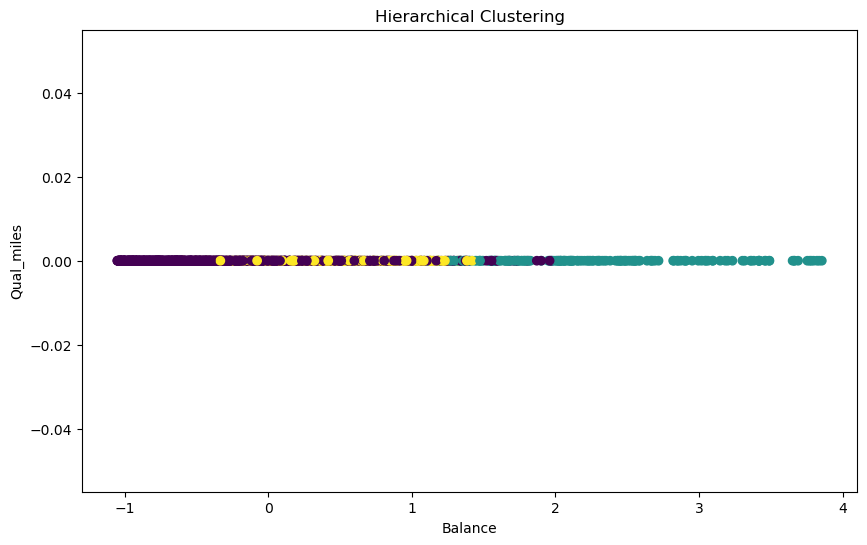

In [71]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import os
os.environ["OMP_NUM_THREADS"] = "7"

# Select features for clustering
X = data[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles']]

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)  # Adjust n_clusters as needed
hierarchical_labels = hierarchical.fit_predict(X)
data['hierarchical_cluster'] = hierarchical_labels

plt.figure(figsize=(10, 6))
plt.scatter(data['Balance'], data['Qual_miles'], c=data['hierarchical_cluster'])
plt.title('Hierarchical Clustering')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()

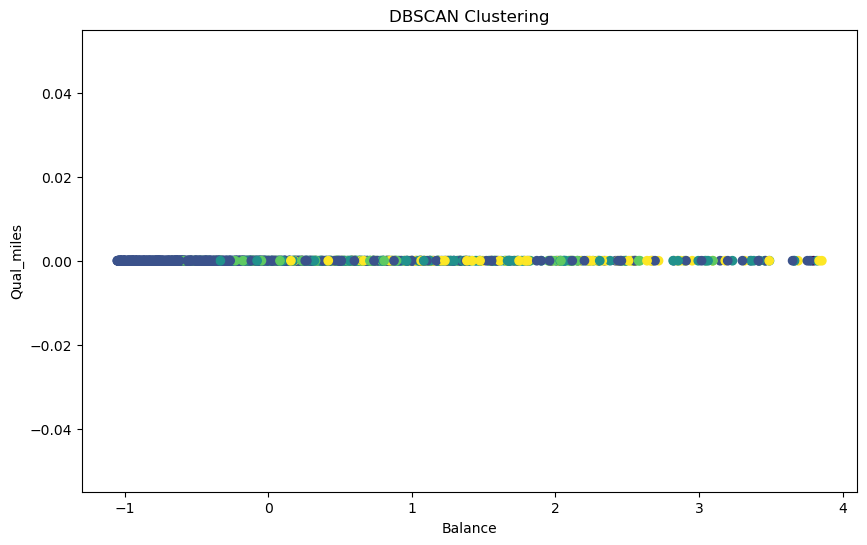

In [72]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import os
os.environ["OMP_NUM_THREADS"] = "7"

# Select features for clustering
X = data[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles']]

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X)
data['dbscan_cluster'] = dbscan_labels


plt.figure(figsize=(10, 6))
plt.scatter(data['Balance'], data['Qual_miles'], c=data['dbscan_cluster'])
plt.title('DBSCAN Clustering')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()


In [73]:
#Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
import os
os.environ["OMP_NUM_THREADS"] = "7"
# Select features for clustering
X = data[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles']]

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42,n_init=10)  # Adjust n_clusters as needed
kmeans_labels = kmeans.fit_predict(X)
data['kmeans_cluster'] = kmeans_labels
kmeans_labels

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)  # Adjust n_clusters as needed
hierarchical_labels = hierarchical.fit_predict(X)
data['hierarchical_cluster'] = hierarchical_labels
hierarchical_labels

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X)
data['dbscan_cluster'] = dbscan_labels
dbscan_labels

C:\Users\NANDAKISHORE BOINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

C:\Users\NANDAKISHORE BOINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\NANDAKISHORE BOINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\NANDAKISHORE BOINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\NANDAKISHORE BOINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarn

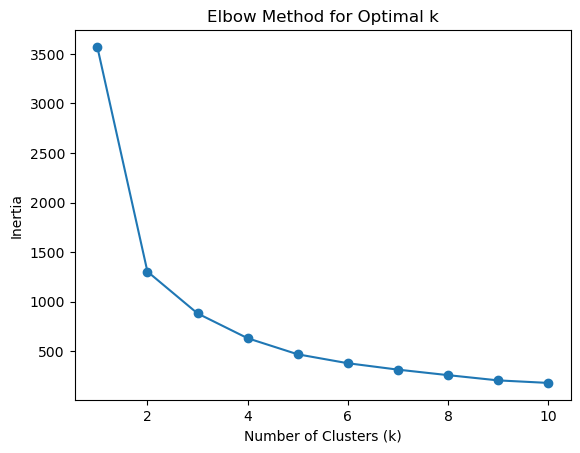

In [74]:
#Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "7"
# K-Means Clustering with Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()



In [75]:
# Hierarchical Clustering with different linkage criteria
linkage_criteria = ['ward', 'complete', 'average', 'single']
for linkage in linkage_criteria:
    hierarchical = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    hierarchical_labels = hierarchical.fit_predict(X)
    data['hierarchical_cluster_' + linkage] = hierarchical_labels
    hierarchical_labels
    

In [76]:
# DBSCAN with different parameters
eps_values = [0.2, 0.5, 1.0]
min_samples_values = [5, 10, 15]
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X)
        data['dbscan_cluster_eps_' + str(eps) + '_min_samples_' + str(min_samples)] = dbscan_labels
        dbscan_labels


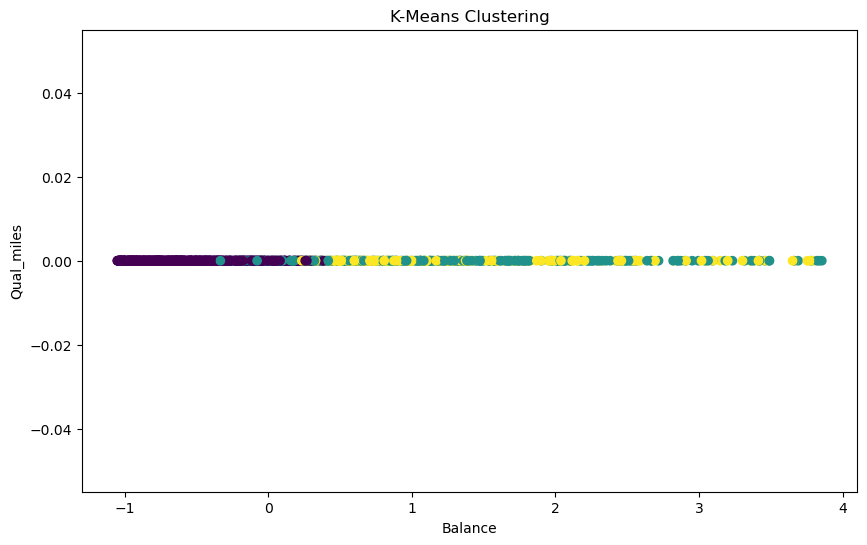

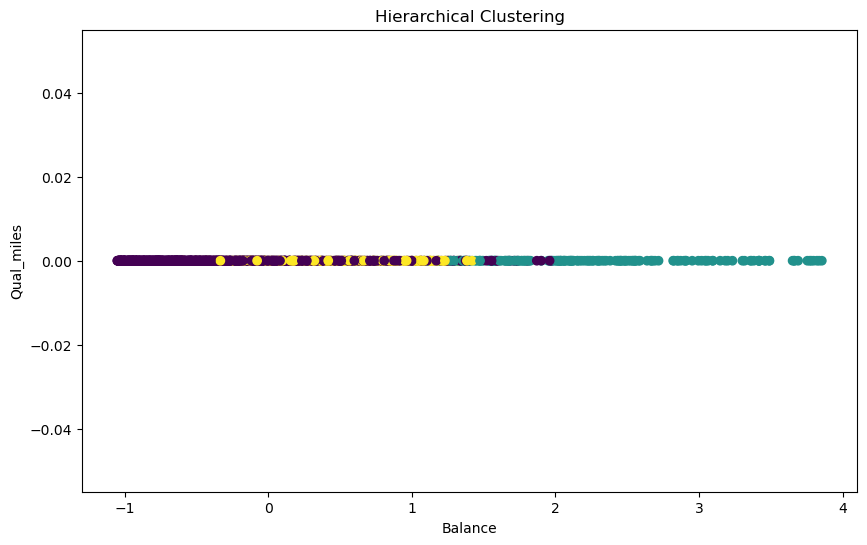

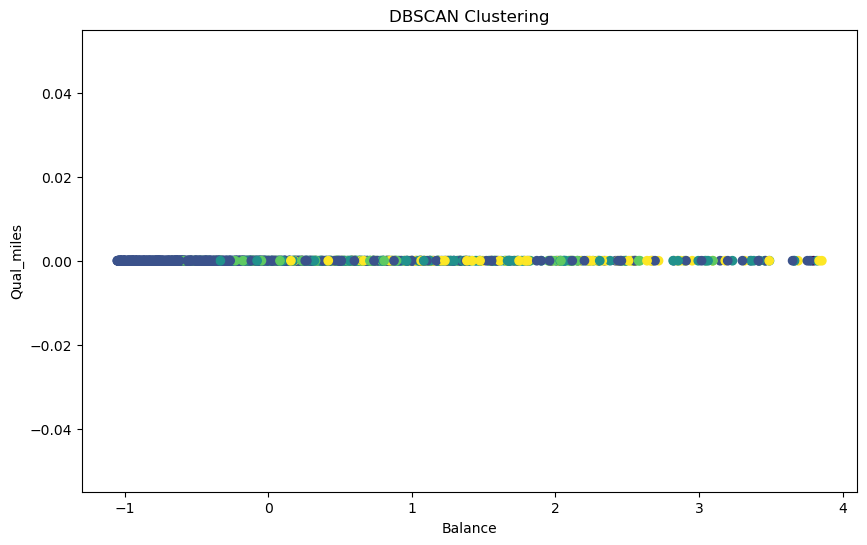

In [77]:
#Visualize the clustering results using scatter plots or other suitable visualization techniques.

import matplotlib.pyplot as plt

# Visualize K-Means clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Balance'], data['Qual_miles'], c=data['kmeans_cluster'])
plt.title('K-Means Clustering')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()

# Visualize Hierarchical clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Balance'], data['Qual_miles'], c=data['hierarchical_cluster'])
plt.title('Hierarchical Clustering')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Balance'], data['Qual_miles'], c=data['dbscan_cluster'])
plt.title('DBSCAN Clustering')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()


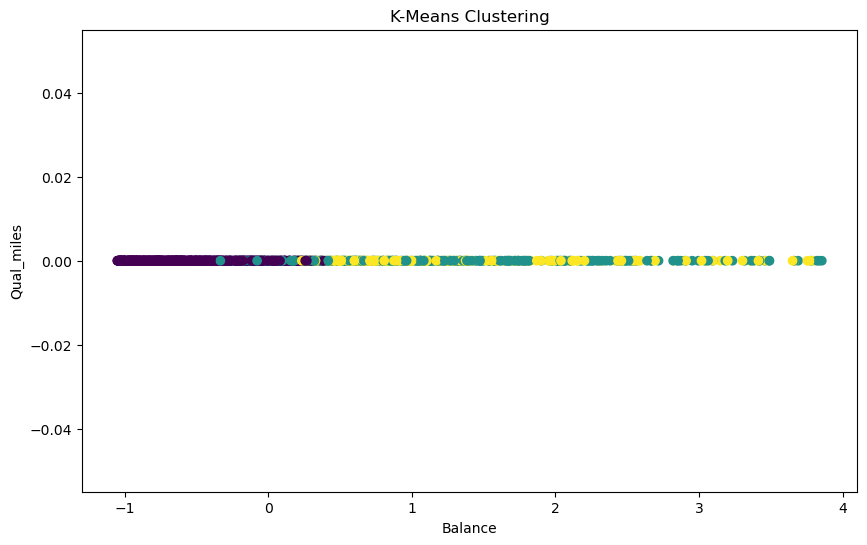

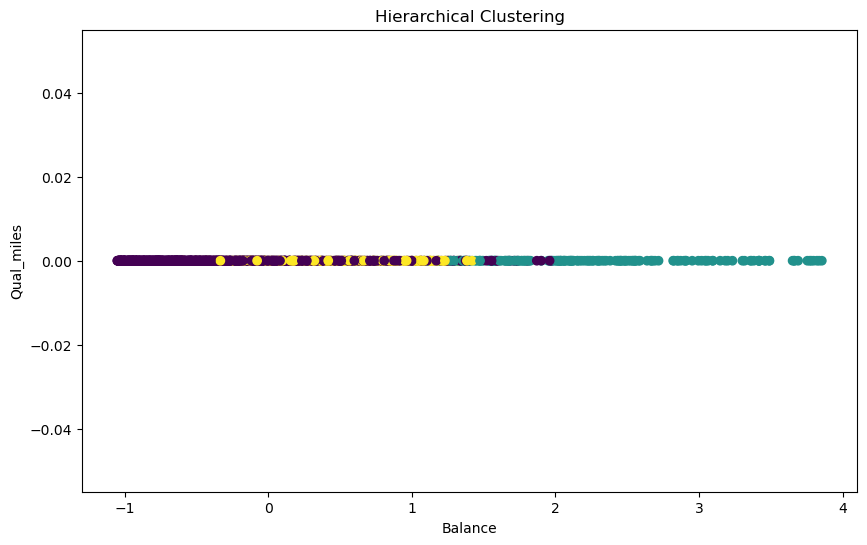

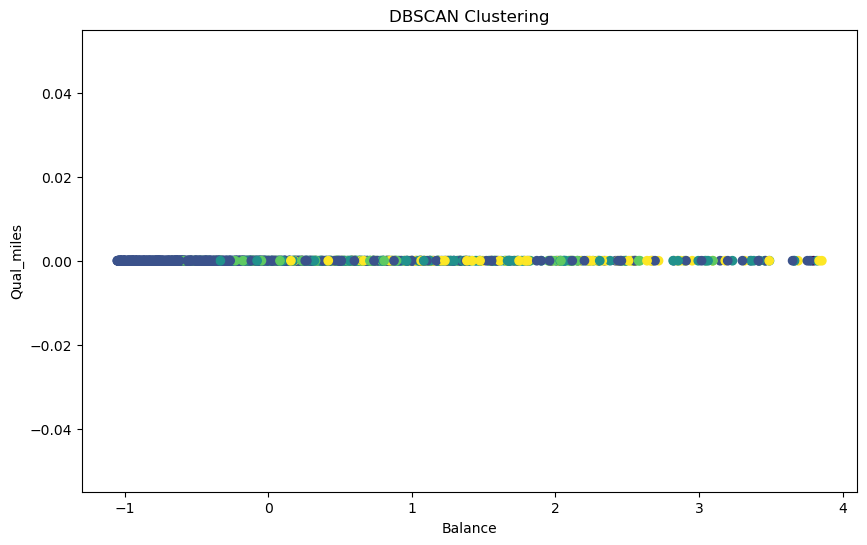

In [78]:
#Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

import matplotlib.pyplot as plt
# Visualize K-Means clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Balance'], data['Qual_miles'], c=data['kmeans_cluster'])
plt.title('K-Means Clustering')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()

# Visualize Hierarchical clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Balance'], data['Qual_miles'], c=data['hierarchical_cluster'])
plt.title('Hierarchical Clustering')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Balance'], data['Qual_miles'], c=data['dbscan_cluster'])
plt.title('DBSCAN Clustering')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()


In [79]:

from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-Means
silhouette_avg_kmeans = silhouette_score(X, kmeans_labels)
print("Silhouette score for K-Means:", silhouette_avg_kmeans)

# Calculate silhouette score for DBSCAN
# Note: DBSCAN may have noisy samples with label -1. We need to filter those out.
dbscan_labels_filtered = [label for label in dbscan_labels if label != -1]
X_filtered = X[dbscan_labels != -1]
if len(dbscan_labels_filtered) > 1:  # Check if there are enough samples after filtering
  silhouette_avg_dbscan = silhouette_score(X_filtered, dbscan_labels_filtered)
  print("Silhouette score for DBSCAN:", silhouette_avg_dbscan)
else:
  print("Not enough samples for DBSCAN silhouette score calculation.")


Silhouette score for K-Means: 0.6234081304025744
Silhouette score for DBSCAN: 0.505280507140407
